In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
% matplotlib inline

## Wisconsin Breast Cancer Database

In [62]:
# import the data
bcw_data = pd.read_csv(os.path.join("data", "uci", "breast-cancer-wisconsin.data"), na_values="?", header=None)

# set the column names
bcw_data.columns = ["ID","THICKNESS","CELL_SIZE_UNIFORMITY","CELL_SHAPE_UNIFORMITY","MARGINAL_ADHESION","EPI_CELL_SIZE","BARE_NUCLEI","BLAND_CHROMATIN","NORMAL_NUCLEOLI","MITOSES","CLASS"]

# update the class to be human readable
#bcw_data.CLASS_[bcw_data.CLASS == 2] = "B"
#bcw_data.CLASS[bcw_data.CLASS == 4] = "M"
bcw_data.head()

,ID,THICKNESS,CELL_SIZE_UNIFORMITY,CELL_SHAPE_UNIFORMITY,MARGINAL_ADHESION,EPI_CELL_SIZE,BARE_NUCLEI,BLAND_CHROMATIN,NORMAL_NUCLEOLI,MITOSES,CLASS
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


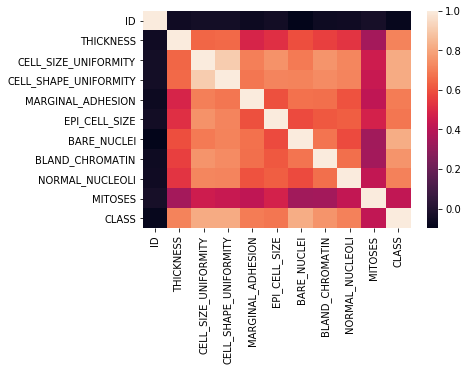

In [32]:
# see if any variables are highly correlated
corr = bcw_data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

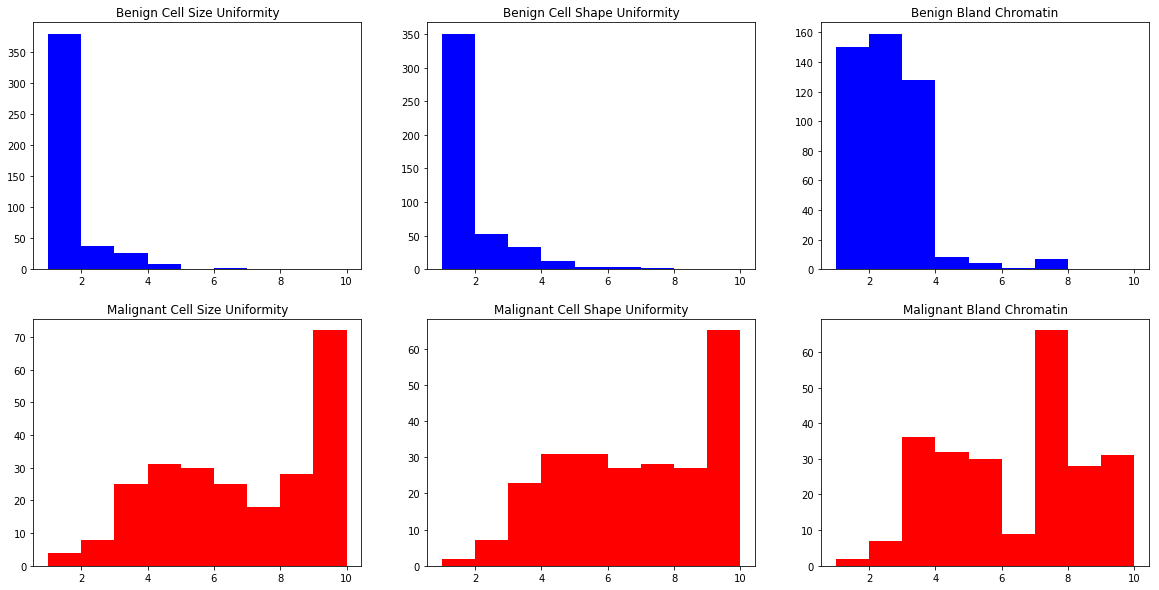

In [33]:
# it looks like the cell size and shape and bland chromatin are correlated to class, let's look at those
benign = bcw_data[bcw_data.CLASS == 2]
malignant = bcw_data[bcw_data.CLASS == 4]
f, ax = plt.subplots(2,3,figsize=(20,10))
ax[0,0].hist(benign.CELL_SIZE_UNIFORMITY, color="blue", bins=range(1,11))
ax[0,0].set_title("Benign Cell Size Uniformity")
ax[0,1].hist(benign.CELL_SHAPE_UNIFORMITY, color="blue", bins=range(1,11))
ax[0,1].set_title("Benign Cell Shape Uniformity")
ax[0,2].hist(benign.BLAND_CHROMATIN, color="blue", bins=range(1,11))
ax[0,2].set_title("Benign Bland Chromatin")

ax[1,0].hist(malignant.CELL_SIZE_UNIFORMITY, color="red", bins=range(1,11))
ax[1,0].set_title("Malignant Cell Size Uniformity")
ax[1,1].hist(malignant.CELL_SHAPE_UNIFORMITY, color="red", bins=range(1,11))
ax[1,1].set_title("Malignant Cell Shape Uniformity")
ax[1,2].hist(malignant.BLAND_CHROMATIN, color="red", bins=range(1,11))
ax[1,2].set_title("Malignant Bland Chromatin")

In [151]:
## Biplot

# clean the data by removing rows with missing values
bcw_data_clean = bcw_data.dropna(axis=0, how="any")

# scale the data
scaler = StandardScaler()
bcw_data_scaled = scaler.fit_transform(bcw_data_clean)

# apply PCA
pca = PCA()
pca_bcw_data = pca.fit_transform(bcw_data_scaled)

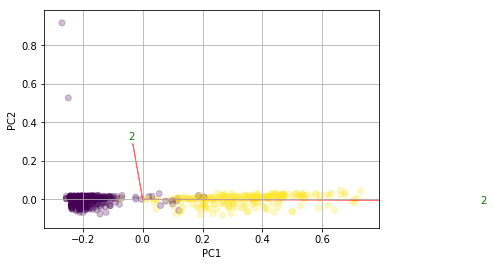

In [157]:
def biplot(score,coeff,pcax,pcay,labels=None):
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=score.shape[1]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley, c=labels, alpha=0.25)
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5) 
        if labels is None:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
    
    #plt.xlim(-1,1)
    #plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()

biplot(pca_bcw_data[:,0:2],pca.components_,1,2,labels=bcw_data_clean.CLASS)

The classes appear to be easily separatable with PCA, as well as with the three features used in the histograms above.

## Wisconsin Diagnostic Breast Cancer (WDBC)

In [213]:
# import the data
wdbc_data = pd.read_csv(os.path.join("data", "uci", "wdbc.data"), na_values="?", header=None)

# set the column names
wdbc_data=wdbc_data.rename(columns = {0:'ID', 1:"CLASS", 2: "MEAN_RADIUS", 3: "MEAN_TEXTURE", 4: "MEAN_PERIMETER", 5: "MEAN_AREA", 6: "MEAN_SMOOTHNESS", 7: "MEAN_COMPACTNESS", 8: "MEAN_CONCAVITY", 9:"MEAN_CONCAVE_POINTS", 10: "MEAN_SYMMETRY", 11: "MEAN_FRACTAL_DIMENSIONS", 12: "RADIUS_SE", 13: "TEXTURE_SE", 14: "PERIMETER_SE", 15: "AREA_SE", 16: "SMOOTHNESS_SE", 17: "COMPACTNESS_SE", 18: "CONCAVITY_SE", 19: "CONCAVE_POINTS_SE", 20: "SYMMETRY_SE",21: "FRACTAL_DIMENSIONS_SE", 22: "WORST_RADIUS", 23: "WORST_TEXTURE", 24: "WORST_PERIMETER", 25: "WORST_AREA", 26: "WORST_SMOOTHNESS", 27: "WORST_COMPACTNESS", 28: "WORST_CONCAVITY", 29: "WORST_CONCAVE_POINTS", 30: "WORST_SYMMETRY", 31: "WORST_FRACTAL_DIMENSIONS"})
wdbc_data['CLASS_INT'] = 0
wdbc_data['CLASS_INT'][wdbc_data.CLASS == "M"] = 1
# update the class to be human readable
wdbc_data.head()

C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,ID,CLASS,MEAN_RADIUS,MEAN_TEXTURE,MEAN_PERIMETER,MEAN_AREA,MEAN_SMOOTHNESS,MEAN_COMPACTNESS,MEAN_CONCAVITY,MEAN_CONCAVE_POINTS,...,WORST_TEXTURE,WORST_PERIMETER,WORST_AREA,WORST_SMOOTHNESS,WORST_COMPACTNESS,WORST_CONCAVITY,WORST_CONCAVE_POINTS,WORST_SYMMETRY,WORST_FRACTAL_DIMENSIONS,CLASS_INT
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


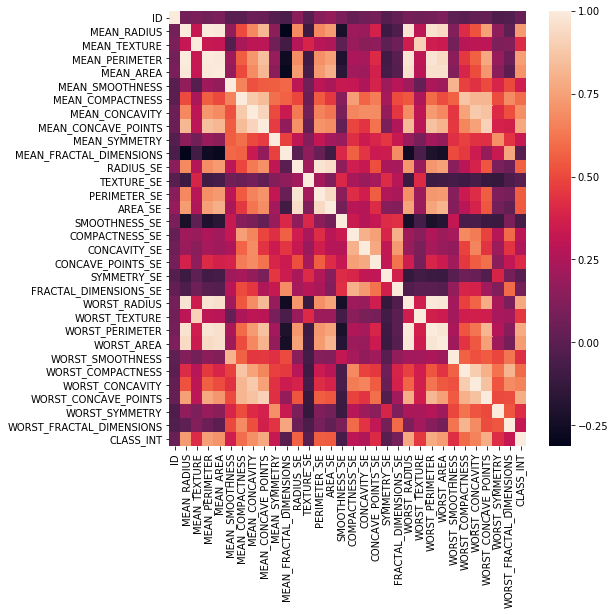

In [233]:
# see if any variables are highly correlated
corr = wdbc_data.corr()
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

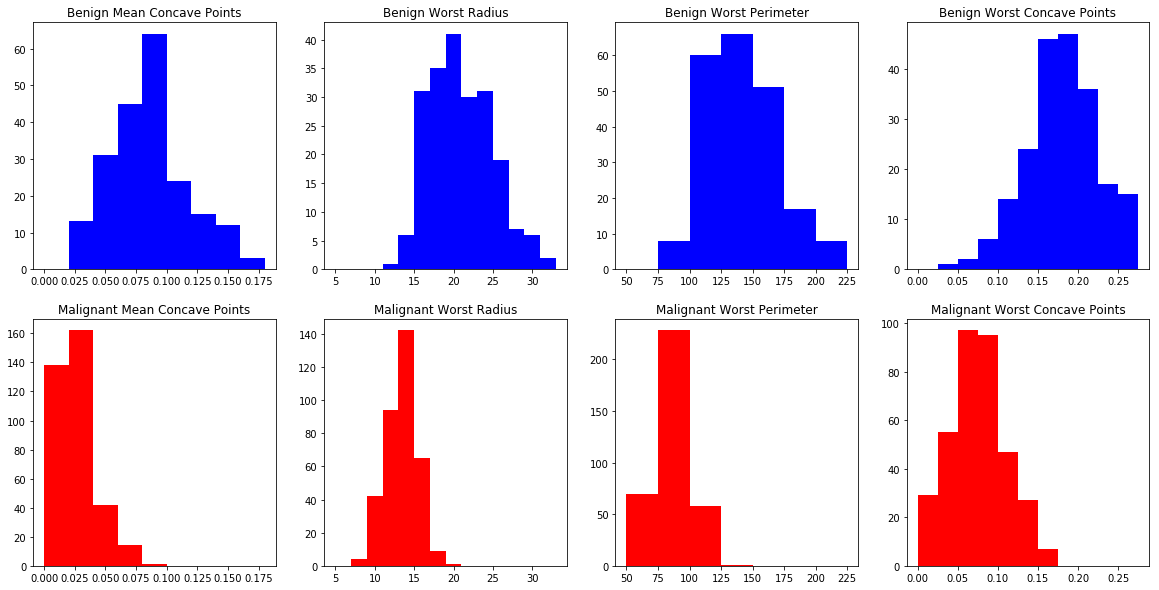

In [215]:
# look at the features which seem to be correlated to class
benign = wdbc_data[wdbc_data.CLASS == 'M']
malignant = wdbc_data[wdbc_data.CLASS == 'B']
f, ax = plt.subplots(2,4,figsize=(20,10))
ax[0,0].hist(benign["MEAN_CONCAVE_POINTS"], color="blue", bins=np.arange(0, 0.2, 0.02))
ax[0,0].set_title("Benign Mean Concave Points")
ax[0,1].hist(benign["WORST_RADIUS"], color="blue", bins=np.arange(5, 35, 2))
ax[0,1].set_title("Benign Worst Radius")
ax[0,2].hist(benign["WORST_PERIMETER"], color="blue", bins=np.arange(50, 250, 25))
ax[0,2].set_title("Benign Worst Perimeter")
ax[0,3].hist(benign["WORST_CONCAVE_POINTS"], color="blue", bins=np.arange(0, 0.3, 0.025))
ax[0,3].set_title("Benign Worst Concave Points")

ax[1,0].hist(malignant["MEAN_CONCAVE_POINTS"], color="red", bins=np.arange(0, 0.2, 0.02))
ax[1,0].set_title("Malignant Mean Concave Points")
ax[1,1].hist(malignant["WORST_RADIUS"], color="red", bins=np.arange(5, 35, 2))
ax[1,1].set_title("Malignant Worst Radius")
ax[1,2].hist(malignant["WORST_PERIMETER"], color="red", bins=np.arange(50, 250, 25))
ax[1,2].set_title("Malignant Worst Perimeter")
ax[1,3].hist(malignant["WORST_CONCAVE_POINTS"], color="red", bins=np.arange(0, 0.3, 0.025))
ax[1,3].set_title("Malignant Worst Concave Points")

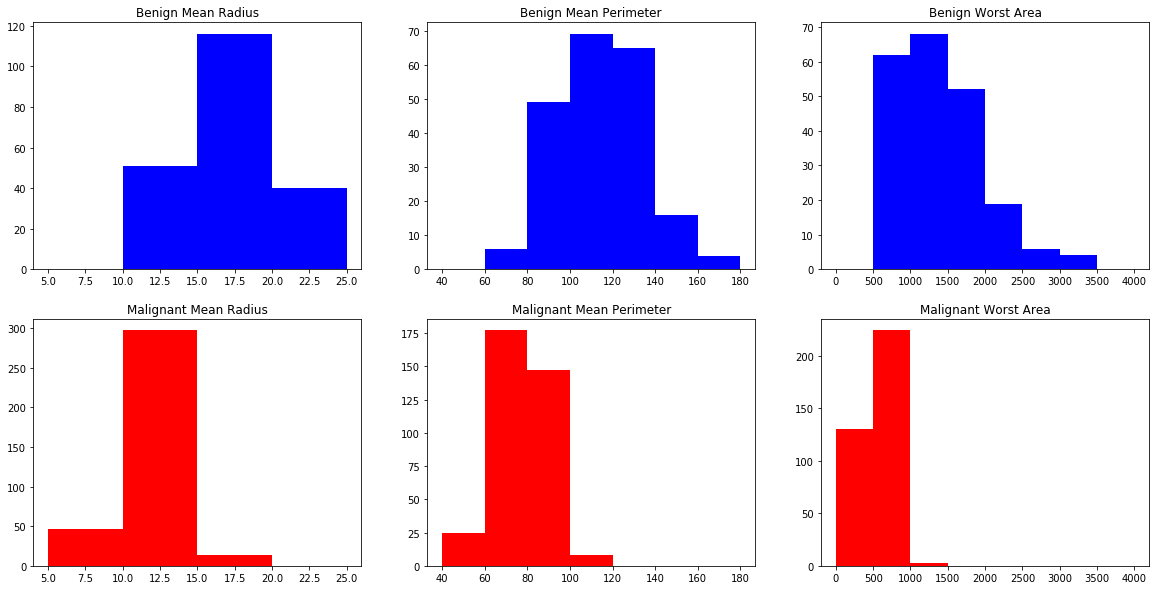

In [224]:
# let's look at some other features
f, ax = plt.subplots(2,3,figsize=(20,10))
ax[0,0].hist(benign["MEAN_RADIUS"], color="blue", bins=np.arange(5, 30, 5))
ax[0,0].set_title("Benign Mean Radius")
ax[0,1].hist(benign["MEAN_PERIMETER"], color="blue", bins=np.arange(40, 200, 20))
ax[0,1].set_title("Benign Mean Perimeter")
ax[0,2].hist(benign["WORST_AREA"], color="blue", bins=np.arange(0, 4500, 500))
ax[0,2].set_title("Benign Worst Area")

ax[1,0].hist(malignant["MEAN_RADIUS"], color="red", bins=np.arange(5, 30, 5))
ax[1,0].set_title("Malignant Mean Radius")
ax[1,1].hist(malignant["MEAN_PERIMETER"], color="red", bins=np.arange(40, 200, 20))
ax[1,1].set_title("Malignant Mean Perimeter")
ax[1,2].hist(malignant["WORST_AREA"], color="red", bins=np.arange(0, 4500, 500))
ax[1,2].set_title("Malignant Worst Area")

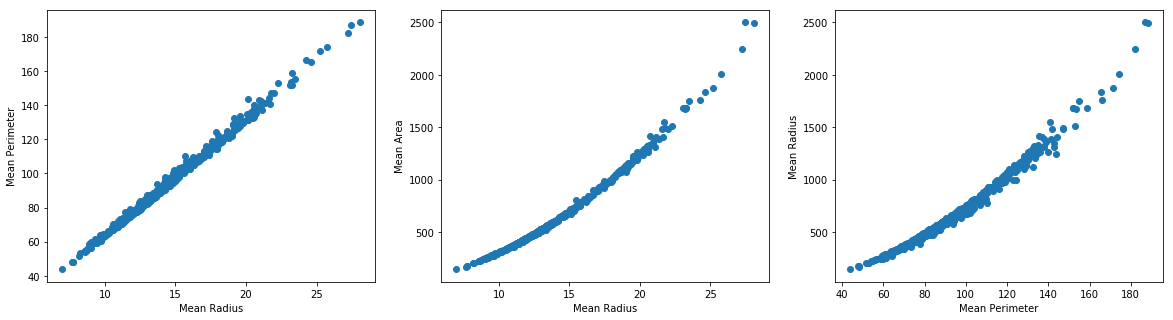

In [232]:
# as one would expect the radius, area and perimeter are all correlated
f, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].scatter(wdbc_data.MEAN_RADIUS, wdbc_data.MEAN_PERIMETER)
ax[0].set_ylabel("Mean Perimeter")
ax[0].set_xlabel("Mean Radius")
ax[1].scatter(wdbc_data.MEAN_RADIUS, wdbc_data.MEAN_AREA)
ax[1].set_ylabel("Mean Area")
ax[1].set_xlabel("Mean Radius")
ax[2].scatter(wdbc_data.MEAN_PERIMETER, wdbc_data.MEAN_AREA)
ax[2].set_xlabel("Mean Perimeter")
ax[2].set_ylabel("Mean Radius")
plt.show()

In [189]:
## Biplot
# clean the data by removing rows with missing values
wdbc_data_clean = wdbc_data.dropna(axis=0, how="any")
wdbc_data_clean = wdbc_data_clean.drop("CLASS", axis=1)

# scale the data
scaler = StandardScaler()
wdbc_data_scaled = scaler.fit_transform(wdbc_data_clean)

# apply PCA
pca2 = PCA()
pca_wdbc_data = pca2.fit_transform(wdbc_data_scaled)

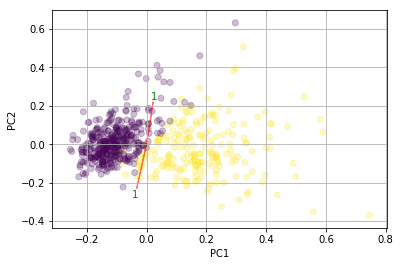

In [191]:
biplot(pca_wdbc_data[:,0:2],pca2.components_,1,2,labels=wdbc_data_clean.CLASS_INT)

This also provides some clear separation for the majority of data points.

## Wisconsin Prognostic Breast Cancer (WPBC)

In [205]:
cc

C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,ID,CLASS,TIME,MEAN_RADIUS,MEAN_TEXTURE,MEAN_PERIMITER,MEAN_AREA,MEAN_SMOOTHNESS,MEAN_COMPACTNESS,MEAN_CONCAVITY,...,WORST_AREA,WORST_SMOOTHNESS,WORST_COMPACTNESS,WORST_CONCAVITY,WORST_CONCAVE_POINTS,WORST_SYMMETRY,WORST_FRACTAL_DIMENSIONS,TUMOR_SIZE,LYMPH_STATUS,CLASS_INT
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0,0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0,0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0,1


The documentation suggests that we filter for a particular endpoint, so let's do what they suggest - recurrence before 24 months = positive, non-recurrence beyond 24 months = negative.

In [234]:
wpbc_data['OUTCOME'] = 0
wpbc_data['OUTCOME'][(wpbc_data.CLASS == "R") & (wpbc_data.TIME <= 24)] = 1

C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


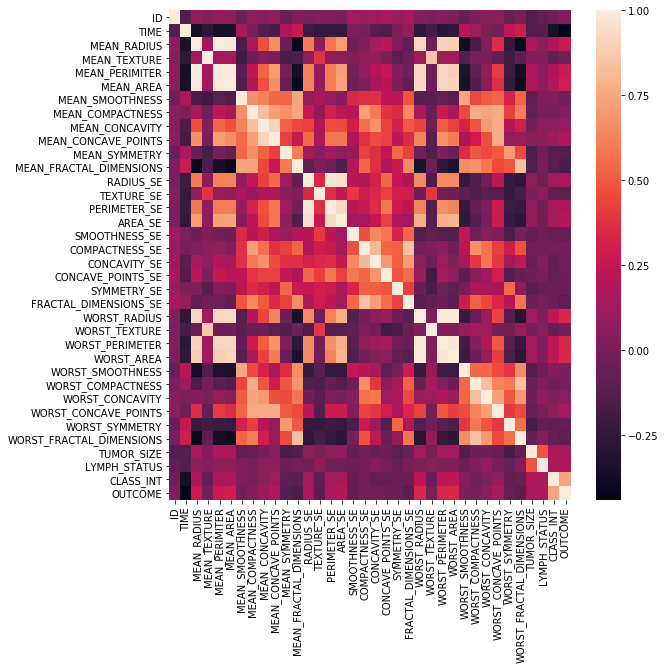

In [236]:
# see if any variables are highly correlated
corr = wpbc_data.corr()
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

There is not too much interesting in this, the perimeter, area and radius are correlated and the mean is correlated to the worst as well. Let's look at the features which appear correlated to class.

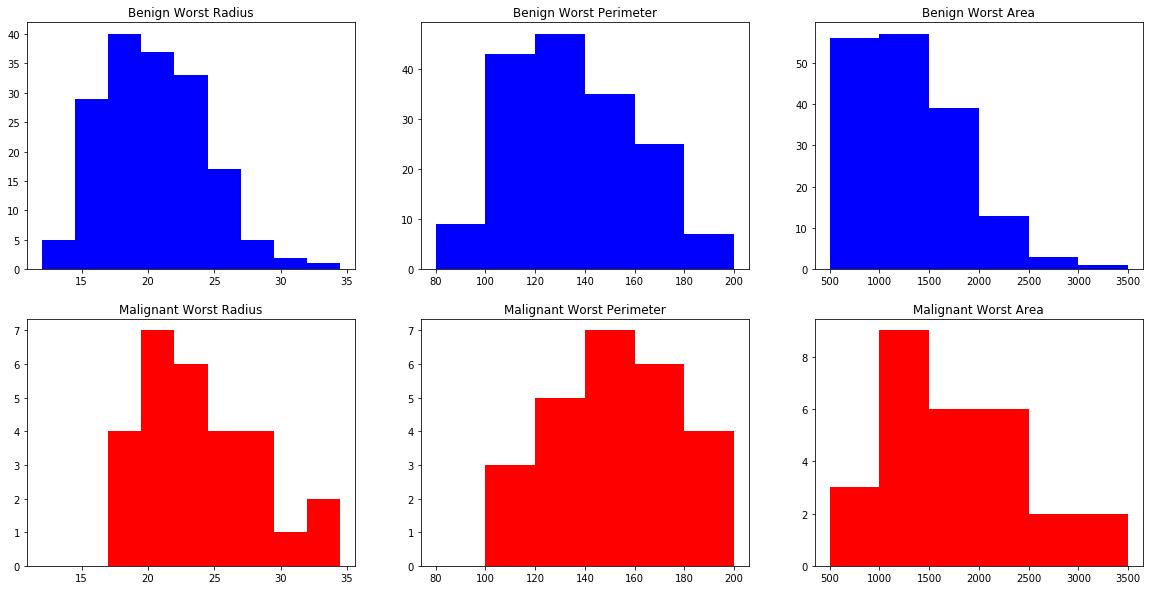

In [237]:
# look at the features which seem to be correlated to class
benign = wpbc_data[wpbc_data.OUTCOME == 0]
malignant = wpbc_data[wpbc_data.OUTCOME == 1]
f, ax = plt.subplots(2,3,figsize=(20,10))
ax[0,0].hist(benign["WORST_RADIUS"], color="blue", bins=np.arange(12, 35, 2.5))
ax[0,0].set_title("Benign Worst Radius")
ax[0,1].hist(benign["WORST_PERIMETER"], color="blue", bins=np.arange(80, 220, 20))
ax[0,1].set_title("Benign Worst Perimeter")
ax[0,2].hist(benign["WORST_AREA"], color="blue", bins=np.arange(500, 4000, 500))
ax[0,2].set_title("Benign Worst Area")

ax[1,0].hist(malignant["WORST_RADIUS"], color="red", bins=np.arange(12, 35, 2.5))
ax[1,0].set_title("Malignant Worst Radius")
ax[1,1].hist(malignant["WORST_PERIMETER"], color="red", bins=np.arange(80, 220, 20))
ax[1,1].set_title("Malignant Worst Perimeter")
ax[1,2].hist(malignant["WORST_AREA"], color="red", bins=np.arange(500, 4000, 500))
ax[1,2].set_title("Malignant Worst Area")


In [238]:
## Biplot
# clean the data by removing rows with missing values
wpbc_data_clean = wpbc_data.dropna(axis=0, how="any")
wpbc_data_clean = wpbc_data_clean.drop("CLASS", axis=1)

# scale the data
scaler = StandardScaler()
wpbc_data_scaled = scaler.fit_transform(wpbc_data_clean)

# apply PCA
pca3 = PCA()
pca_wpbc_data = pca3.fit_transform(wpbc_data_scaled)

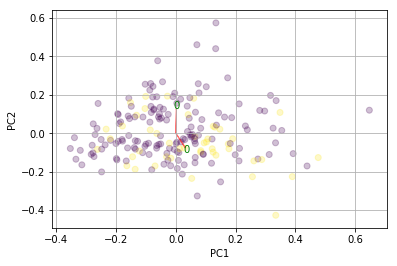

In [239]:
biplot(pca_wpbc_data[:,0:2],pca3.components_,1,2,labels=wpbc_data_clean.CLASS_INT)

It is much harder to see separation in this dataset.